In [27]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
from matplotlib.dates import DateFormatter

In [4]:
def parse(x):
    return pd.to_datetime(x, infer_datetime_format=True, unit='s',utc=True)

In [5]:
df = pd.read_csv('../input/environmental-sensor-data-132k/iot_telemetry_data.csv', delimiter=',',
                  header=0,
                  infer_datetime_format=True,
                  date_parser=parse,
                  index_col=['ts'])

In [6]:
df.head()

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
2020-07-12 00:01:34.735567570+00:00,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2020-07-12 00:01:38.073572874+00:00,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
2020-07-12 00:01:39.589145899+00:00,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
2020-07-12 00:01:41.761234999+00:00,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [7]:
df.replace(['00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51'], [1, 2, 3], inplace=True)

In [8]:
# sort data by timestamp
df = df.sort_values(by='ts', ascending=True)

In [9]:
df.head()

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,3,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
2020-07-12 00:01:34.735567570+00:00,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2020-07-12 00:01:38.073572874+00:00,3,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
2020-07-12 00:01:39.589145899+00:00,2,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
2020-07-12 00:01:41.761234999+00:00,3,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [10]:
# convert temperature from celsius to fahrenheit (°C to °F)
df['temp'] = (df['temp'] * 1.8) + 32

In [11]:
df.head()

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,3,0.004956,51.000000,False,0.007651,False,0.020411,72.860000
2020-07-12 00:01:34.735567570+00:00,1,0.002840,76.000000,False,0.005114,False,0.013275,67.460001
2020-07-12 00:01:38.073572874+00:00,3,0.004976,50.900000,False,0.007673,False,0.020475,72.680000
2020-07-12 00:01:39.589145899+00:00,2,0.004403,76.800003,True,0.007023,False,0.018628,80.600000
2020-07-12 00:01:41.761234999+00:00,3,0.004967,50.900000,False,0.007664,False,0.020448,72.680000


In [12]:
df['device'].unique()

array([3, 1, 2])

In [13]:
# convert temperature from celsius to fahrenheit (°C to °F)
df['temp'] = (df['temp'] * 1.8) + 32# convert temperature from celsius to fahrenheit (°C to °F)
df['temp'] = (df['temp'] * 1.8) + 32

In [14]:
df.head()

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,3,0.004956,51.000000,False,0.007651,False,0.020411,325.666400
2020-07-12 00:01:34.735567570+00:00,1,0.002840,76.000000,False,0.005114,False,0.013275,308.170404
2020-07-12 00:01:38.073572874+00:00,3,0.004976,50.900000,False,0.007673,False,0.020475,325.083200
2020-07-12 00:01:39.589145899+00:00,2,0.004403,76.800003,True,0.007023,False,0.018628,350.744000
2020-07-12 00:01:41.761234999+00:00,3,0.004967,50.900000,False,0.007664,False,0.020448,325.083200


In [15]:
groups = df.groupby('device')

In [16]:
groups.head()

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,3,0.004956,51.000000,False,0.007651,False,0.020411,325.666400
2020-07-12 00:01:34.735567570+00:00,1,0.002840,76.000000,False,0.005114,False,0.013275,308.170404
2020-07-12 00:01:38.073572874+00:00,3,0.004976,50.900000,False,0.007673,False,0.020475,325.083200
2020-07-12 00:01:39.589145899+00:00,2,0.004403,76.800003,True,0.007023,False,0.018628,350.744000
2020-07-12 00:01:41.761234999+00:00,3,0.004967,50.900000,False,0.007664,False,0.020448,325.083200
2020-07-12 00:01:44.468410730+00:00,2,0.004391,77.900002,True,0.007009,False,0.018589,350.744000
2020-07-12 00:01:45.448863745+00:00,3,0.004976,50.900000,False,0.007673,False,0.020475,325.083200
2020-07-12 00:01:46.869076014+00:00,1,0.002938,76.000000,False,0.005241,False,0.013628,308.170404
2020-07-12 00:01:48.275381565+00:00,2,0.004345,77.900002,True,0.006957,False,0.018440,350.744000


In [17]:
# filter temp/humidity, by device, for outliers (>1% & <99%)
df = df.loc[df['temp'] >df.groupby('device').temp.transform(lambda x: x.quantile(.01))]
df = df.loc[df['temp'] < df.groupby('device').temp.transform(lambda x: x.quantile(.99))]

df = df.loc[df['humidity'] > df.groupby('device').humidity.transform(lambda x: x.quantile(.01))]
df = df.loc[df['humidity'] < df.groupby('device').humidity.transform(lambda x: x.quantile(.99))]

In [18]:
df.corr()

,device,co,humidity,light,lpg,motion,smoke,temp
device,1.000000,0.736328,-0.915201,-0.134643,0.744881,0.005044,0.743787,0.342490
co,0.736328,1.000000,-0.697887,-0.229020,0.997815,0.000005,0.998525,0.125368
humidity,-0.915201,-0.697887,1.000000,0.071912,-0.707122,-0.012139,-0.705878,-0.412213
light,-0.134643,-0.229020,0.071912,1.000000,-0.206575,0.032460,-0.210785,0.772995
lpg,0.744881,0.997815,-0.707122,-0.206575,1.000000,0.000899,0.999930,0.148614
motion,0.005044,0.000005,-0.012139,0.032460,0.000899,1.000000,0.000737,0.037861
smoke,0.743787,0.998525,-0.705878,-0.210785,0.999930,0.000737,1.000000,0.144492
temp,0.342490,0.125368,-0.412213,0.772995,0.148614,0.037861,0.144492,1.000000


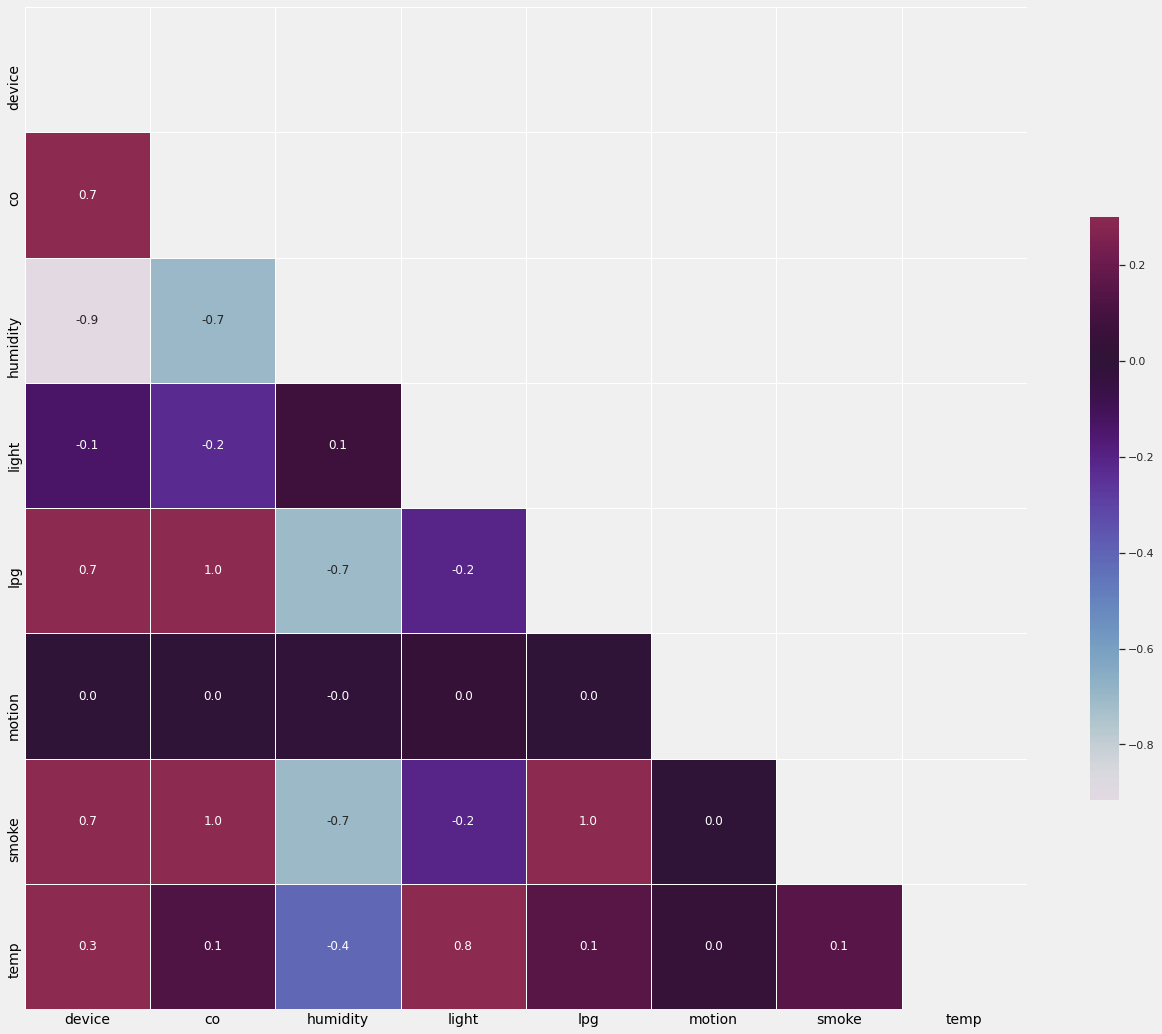

In [19]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(font_scale=1)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, fmt=".1f", mask=mask, cmap='twilight', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('corr.png')

### Moving Average Graphs

##### Smoothing data using the mean average of a 1 minute rolling window (moving average).
##### 1 minute == (20) data-points @ 3 second intervals
##### I hour = (20) data-points @ 3 second intervals * 60 minutes

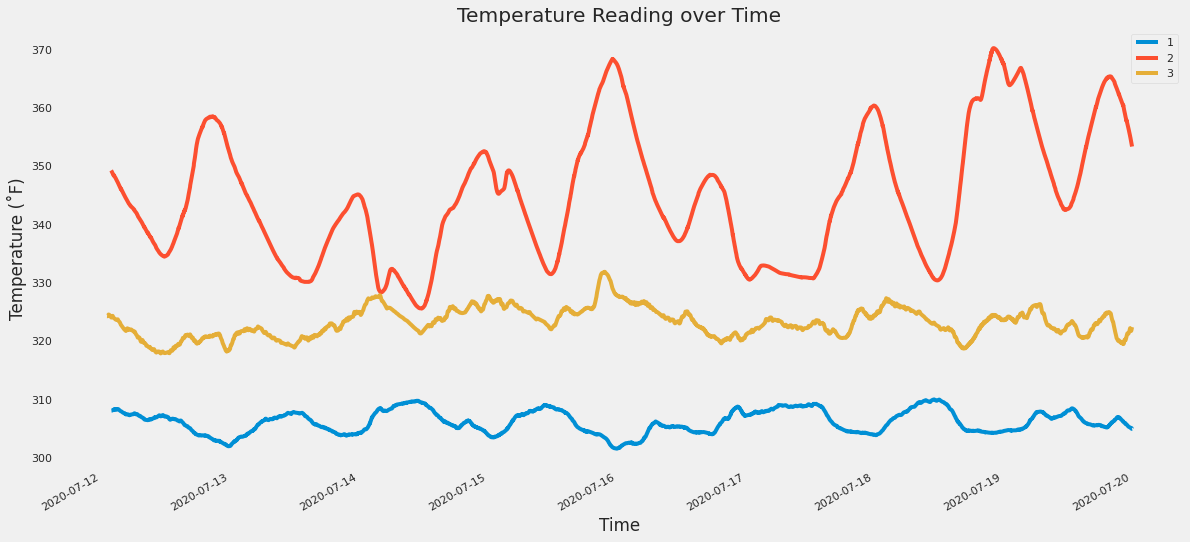

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.temp.rolling(window=20*60).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Temperature Reading over Time')
plt.ylabel('Temperature (˚F)')
plt.xlabel('Time')
plt.show()

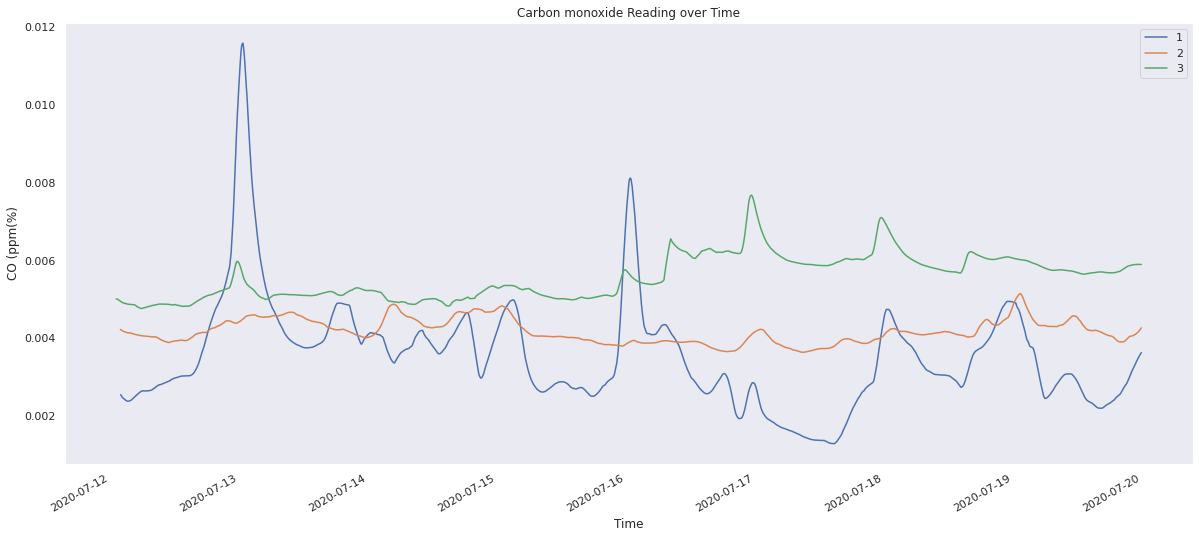

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.co.rolling(window=20*60).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Carbon monoxide Reading over Time')
plt.ylabel('CO (ppm(%)')
plt.xlabel('Time')
plt.show()

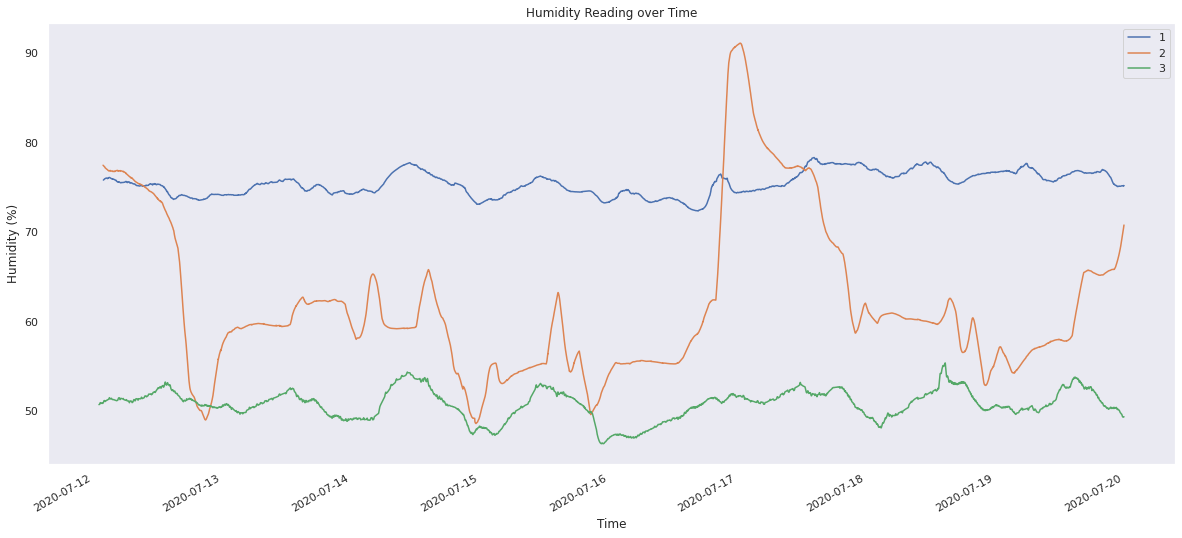

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.humidity.rolling(window=20*60).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Humidity Reading over Time')
plt.ylabel('Humidity (%)')
plt.xlabel('Time')
plt.show()

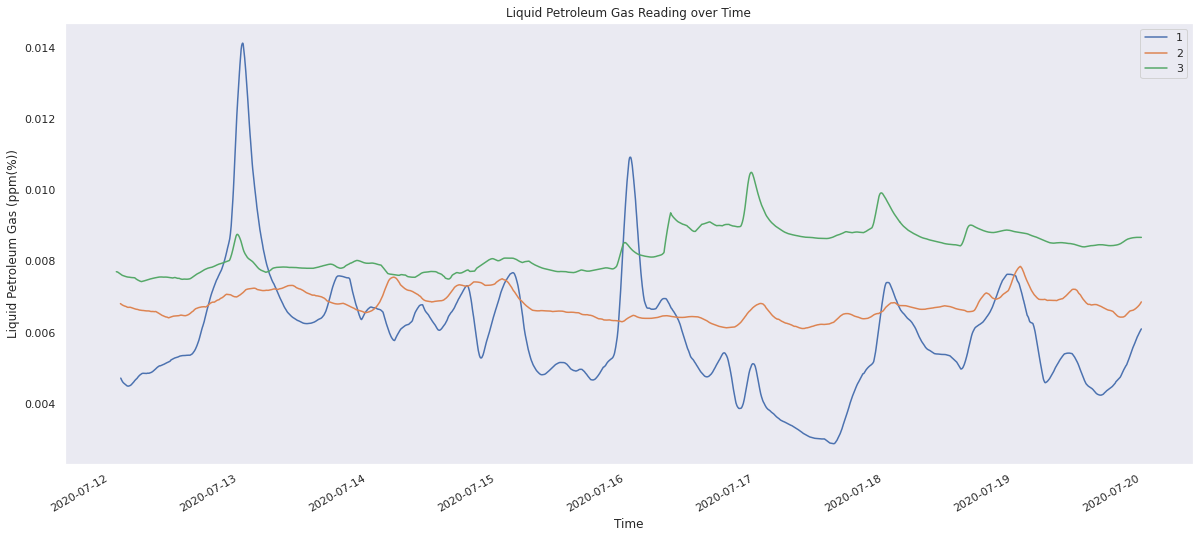

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.lpg.rolling(window=20*60).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Liquid Petroleum Gas Reading over Time')
plt.ylabel('Liquid Petroleum Gas (ppm(%))')
plt.xlabel('Time')
plt.show()

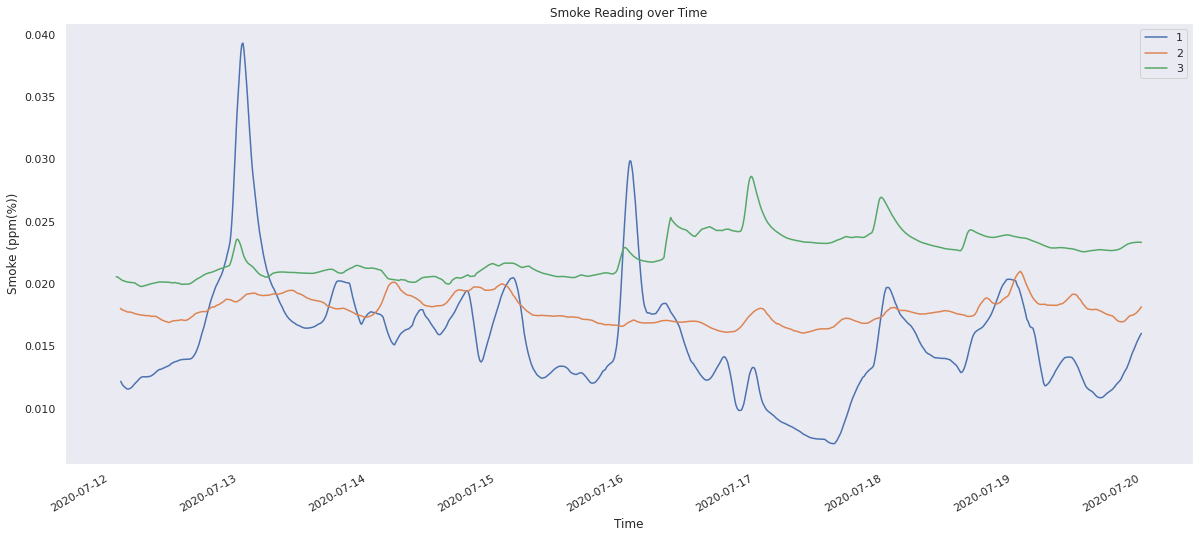

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.smoke.rolling(window=20*60).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Smoke Reading over Time')
plt.ylabel('Smoke (ppm(%))')
plt.xlabel('Time')
plt.show()

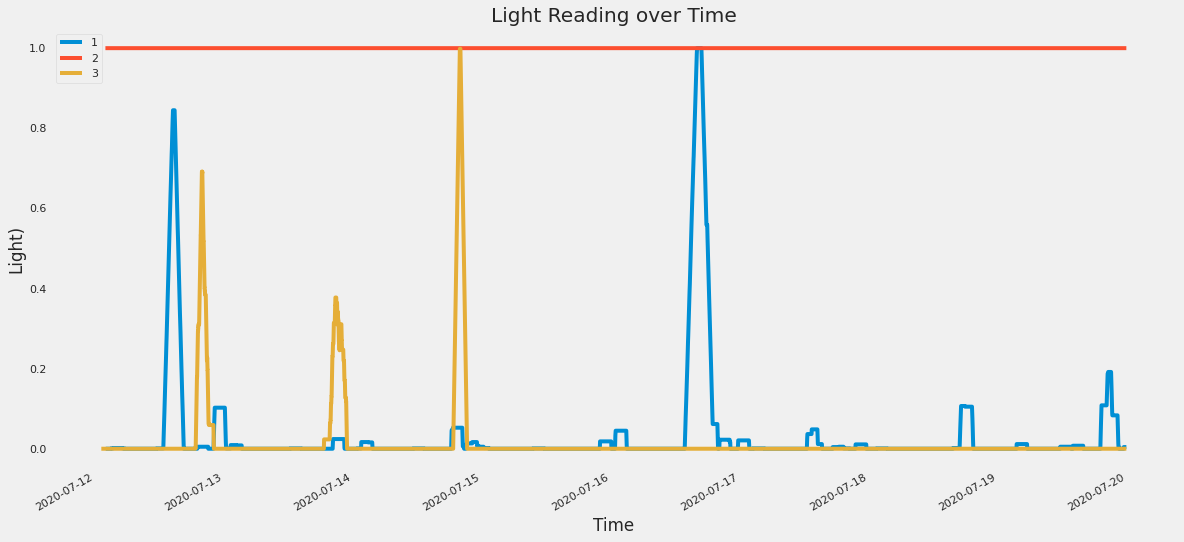

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.light.rolling(window=20*60).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Light Reading over Time')
plt.ylabel('Light)')
plt.xlabel('Time')
plt.show()

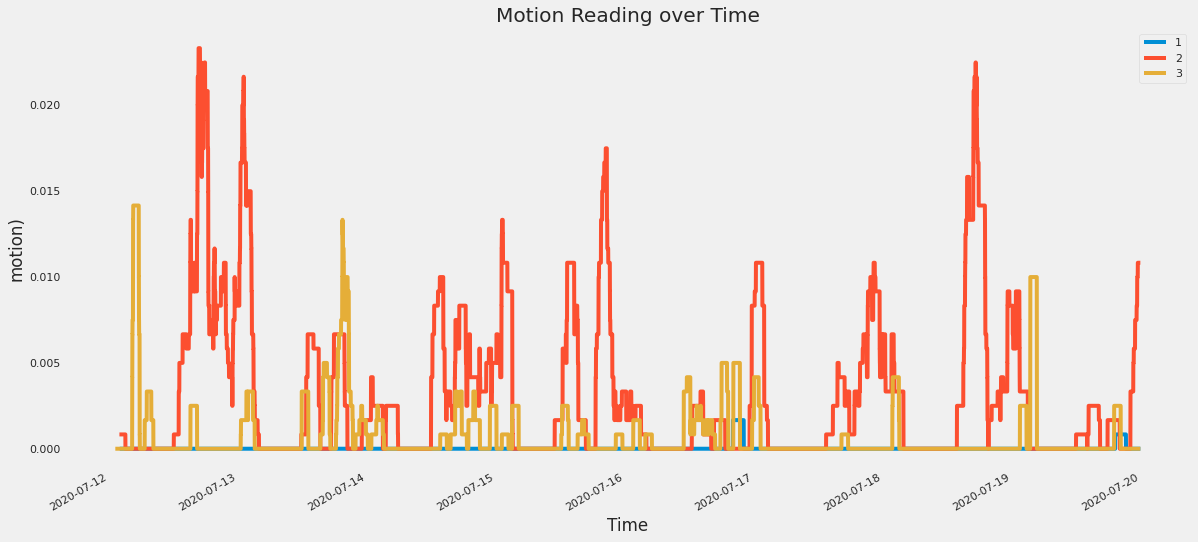

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.motion.rolling(window=20*60).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Motion Reading over Time')
plt.ylabel('motion)')
plt.xlabel('Time')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



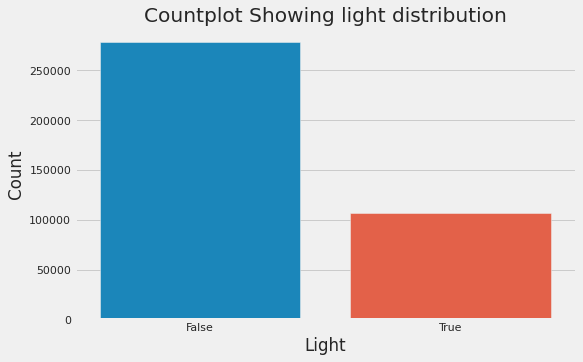

In [63]:
plt.figure(figsize=(8, 5))
sns.countplot(df['light'])
plt.xlabel('Light')
plt.ylabel("Count")
plt.title('Countplot Showing light distribution')
plt.show()
#plt.savefig('imbalance.png')

In [48]:
df['motion'].value_counts()

False    385009
True        455
Name: motion, dtype: int64

In [49]:
df['motion'].value_counts()

False    385009
True        455
Name: motion, dtype: int64

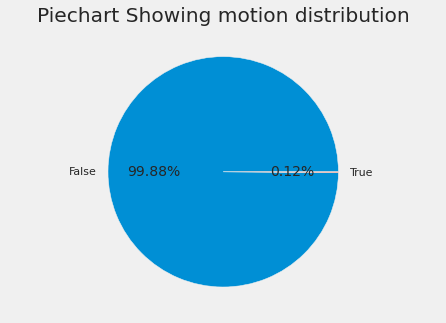

In [69]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
motion = ['False', 'True']
count = [385009,455]
ax.pie(count, labels = motion,autopct='%1.2f%%')
plt.title('Piechart Showing motion distribution')
plt.show()

In [33]:
df_1 = df[df.device == 1]
df_2 = df[df.device == 2]
df_3 = df[df.device == 3]

In [34]:
df_1['motion'].value_counts()

False    106185
True          2
Name: motion, dtype: int64

In [35]:
df_1['light'].value_counts()

False    103644
True       2543
Name: light, dtype: int64

In [37]:
df_2['motion'].value_counts()

False    100746
True        310
Name: motion, dtype: int64

In [38]:
df_2['light'].value_counts()

True    101056
Name: light, dtype: int64

In [39]:
df_3['motion'].value_counts()

False    178078
True        143
Name: motion, dtype: int64

In [40]:
df_3['light'].value_counts()

False    175220
True       3001
Name: light, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



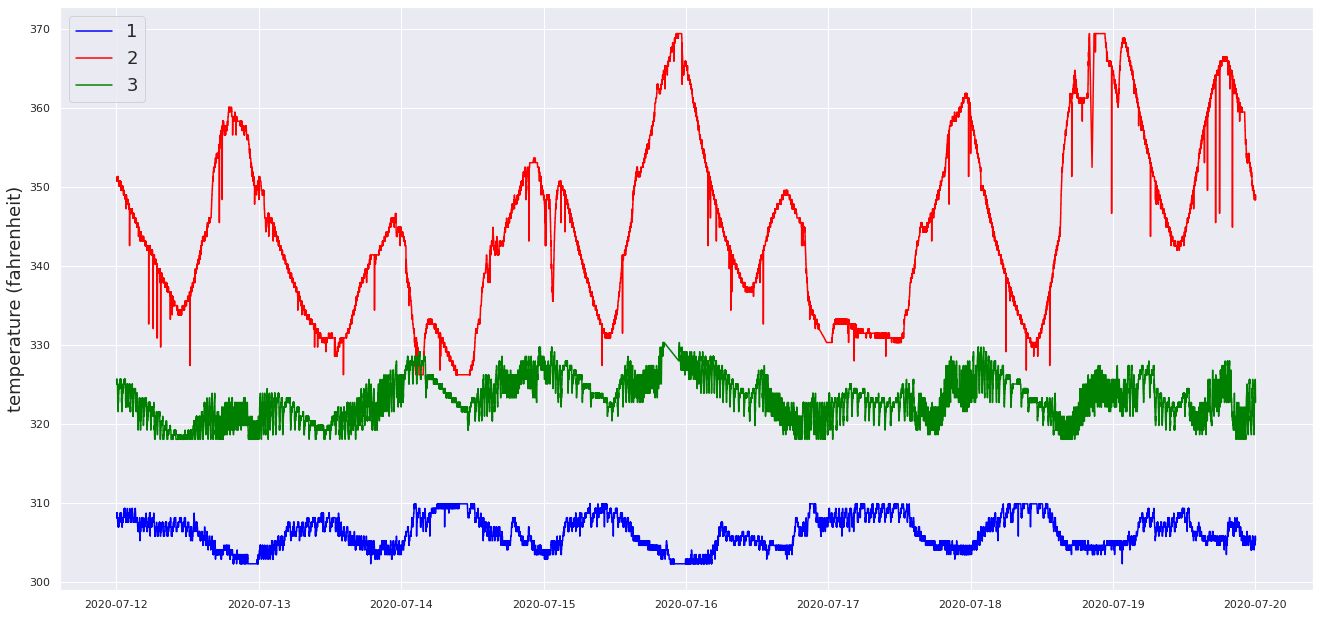

In [52]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.index, df_1.temp, color = 'blue', label = '1')
ax2 = sns.lineplot(df_2.index, df_2.temp, color = 'red', label = '2')
ax3 = sns.lineplot(df_3.index, df_3.temp, color = 'green', label = '3')
plt.ylabel('temperature (fahrenheit)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



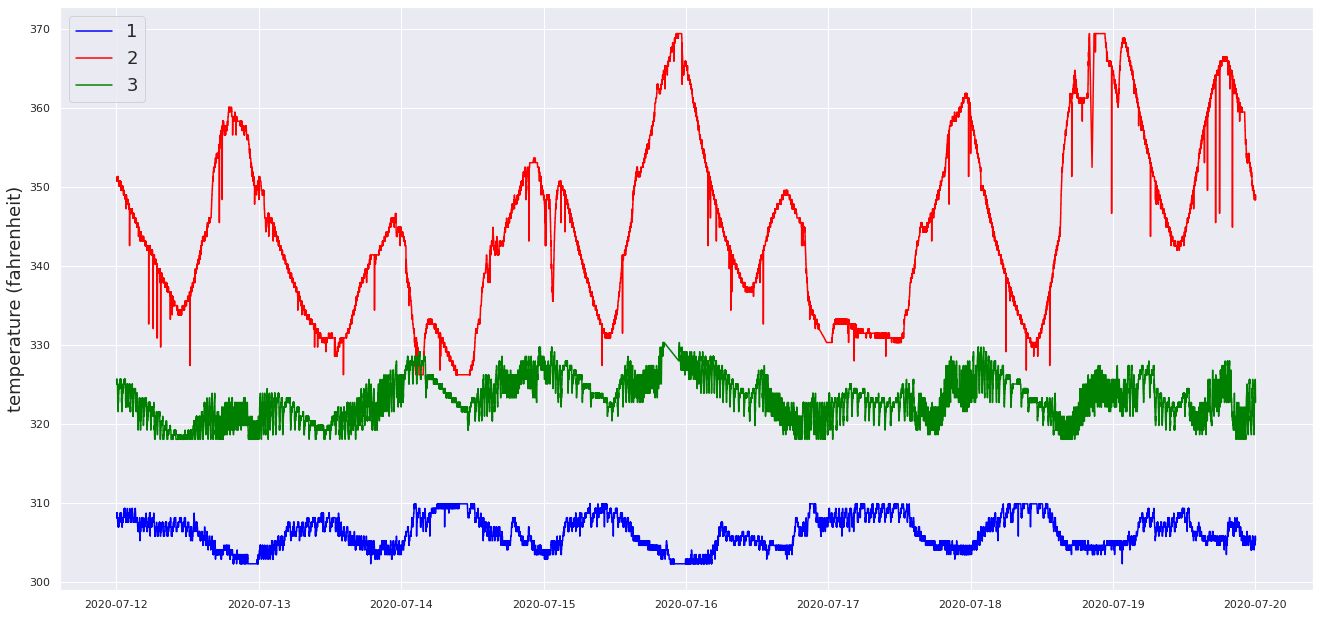

In [53]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.index, df_1.temp, color = 'blue', label = '1')
ax2 = sns.lineplot(df_2.index, df_2.temp, color = 'red', label = '2')
ax3 = sns.lineplot(df_3.index, df_3.temp, color = 'green', label = '3')
plt.ylabel('temperature (fahrenheit)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()

In [54]:
### Explore Time series

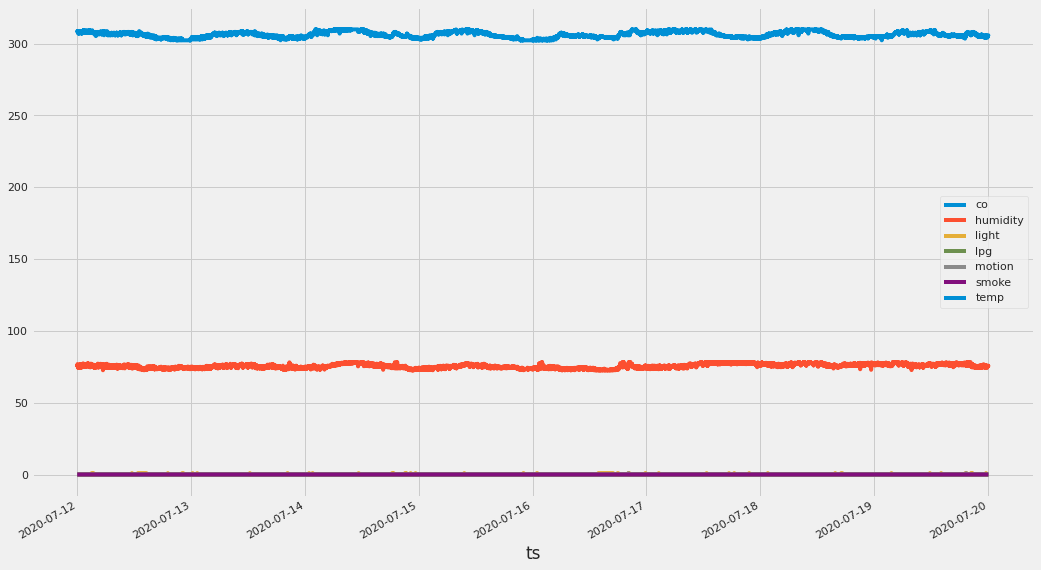

In [71]:
data1 = df
data1 = data1[data1.device == 1]
data1= data1.drop(columns=['device'])
# Plot each feature vs time
fig, ax = plt.subplots(figsize=(16, 10))
for col in data1.columns:
    data1[col] = data1[col].astype('float64')    
    data1.plot(y=col, use_index=True, ax=ax)
plt.show()

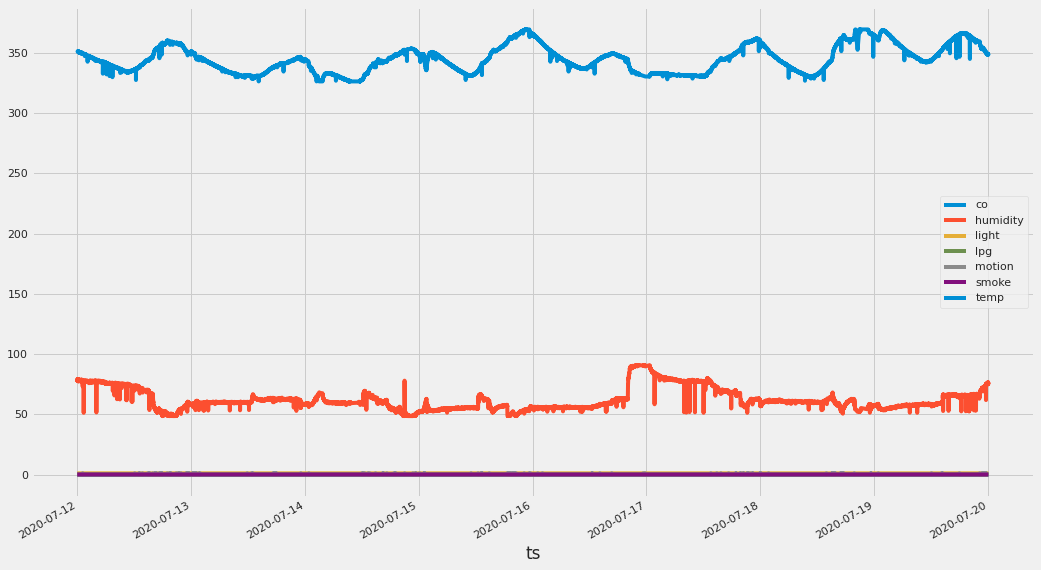

In [70]:
data2 = df
data2 = data2[data2.device == 2]
data2= data2.drop(columns=['device'])
# Plot each feature vs time
fig, ax = plt.subplots(figsize=(16, 10))
for col in data2.columns:
    data2[col] = data2[col].astype('float64')    
    data2.plot(y=col, use_index=True, ax=ax)
plt.show()

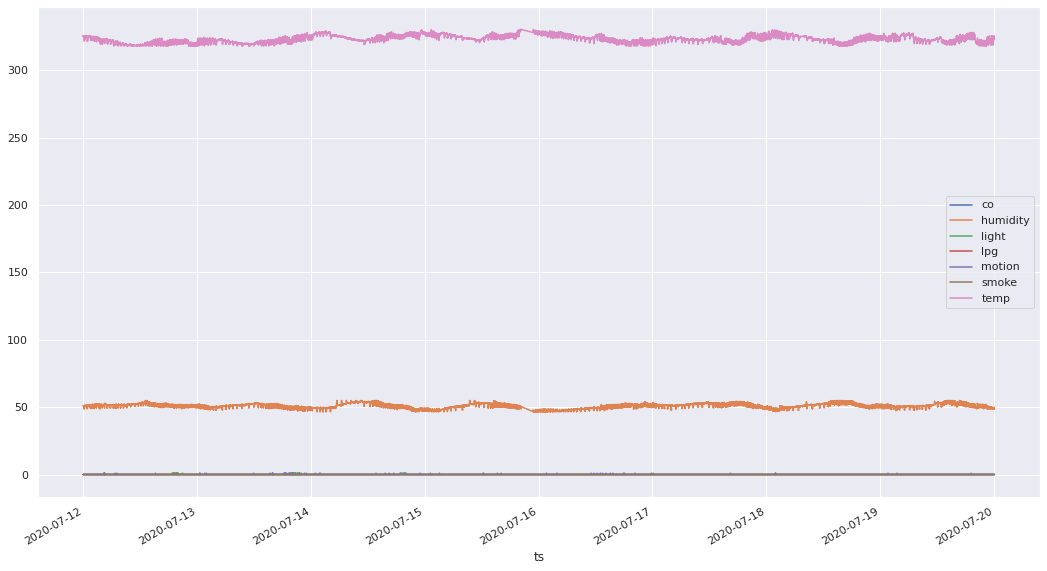

In [57]:
data3 = df
data3 = data3[data3.device == 3]
data3= data3.drop(columns=['device'])
# Plot each feature vs time
fig, ax = plt.subplots(figsize=(16, 10))
for col in data3.columns:
    data3[col] = data3[col].astype('float64')    
    data3.plot(y=col, use_index=True, ax=ax)
plt.show()

### Time series of single plots in device1

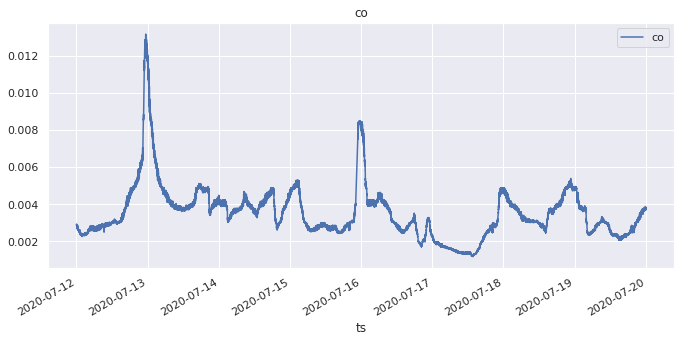

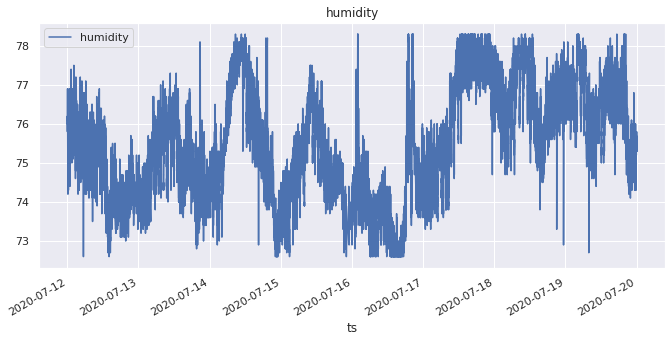

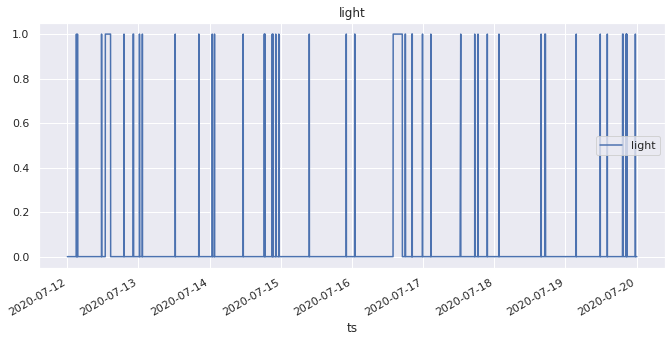

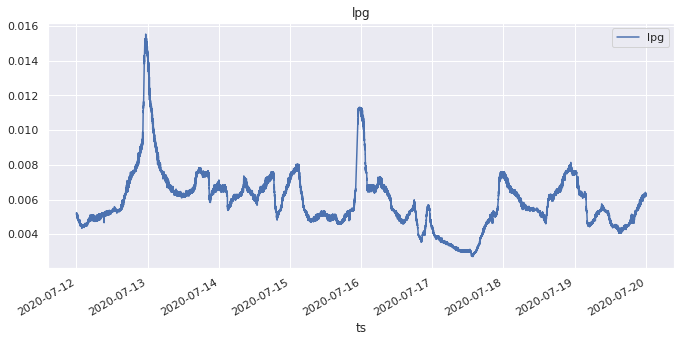

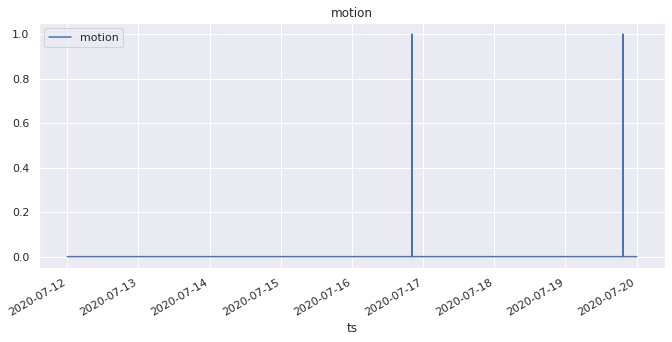

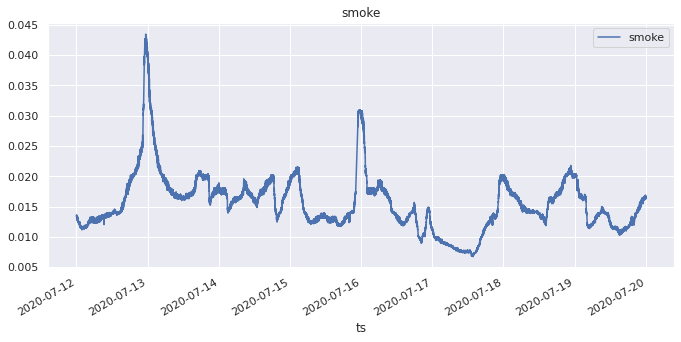

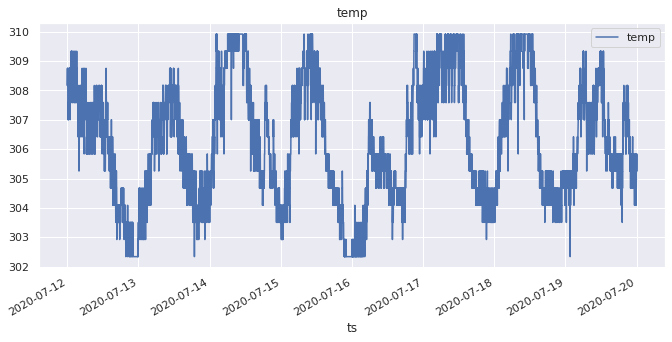

In [58]:
for col in data1.columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    data1.plot(y=col, use_index=True, ax=ax)
    ax.set_title(col)
plt.show()

### Time series of single plots in device2

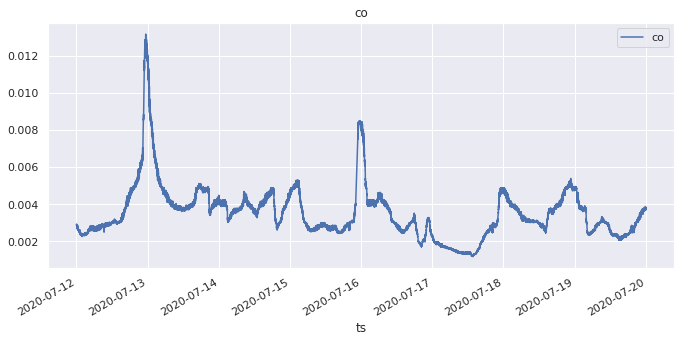

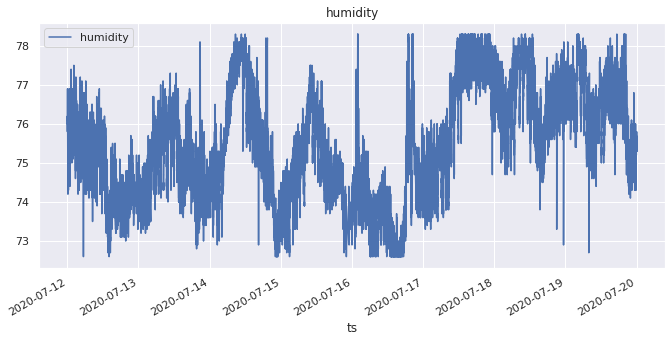

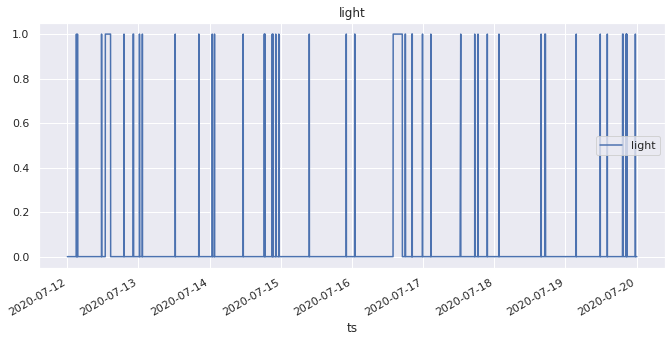

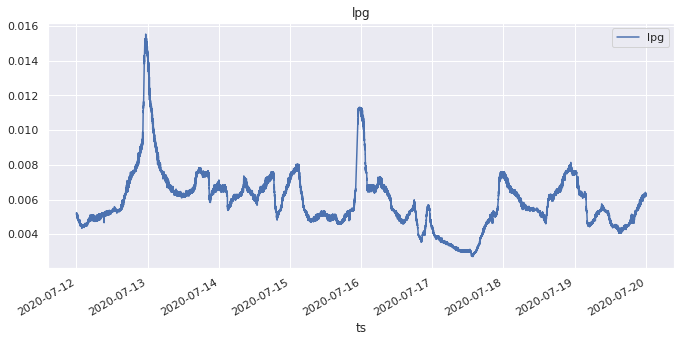

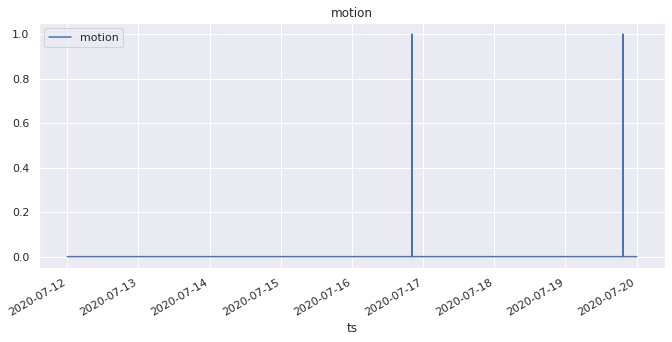

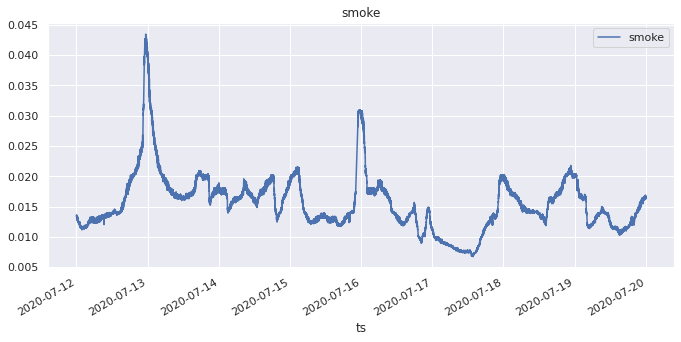

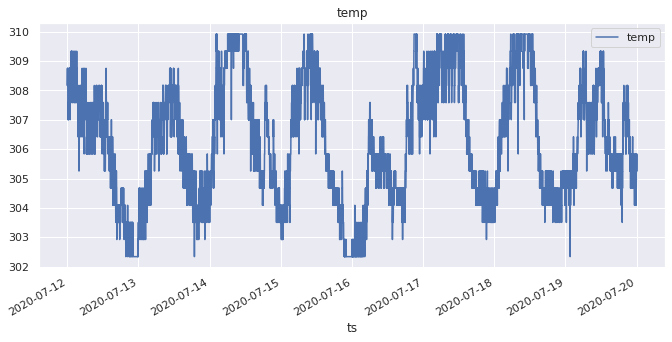

In [59]:
for col in data2.columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    data1.plot(y=col, use_index=True, ax=ax)
    ax.set_title(col)
plt.show()

### Time series of single plots in device3

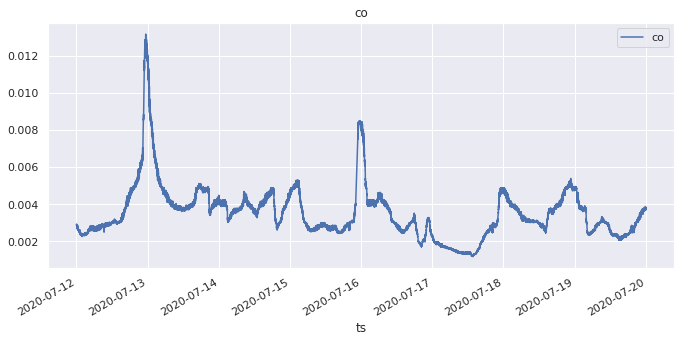

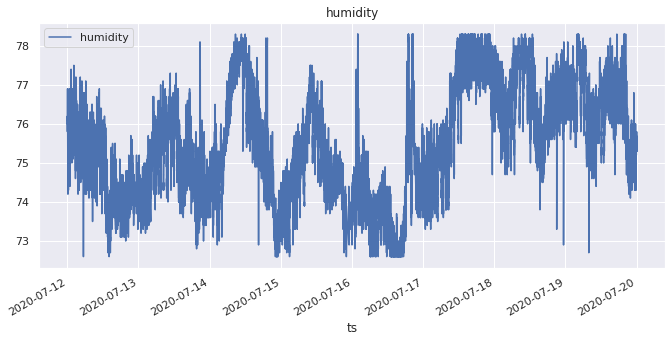

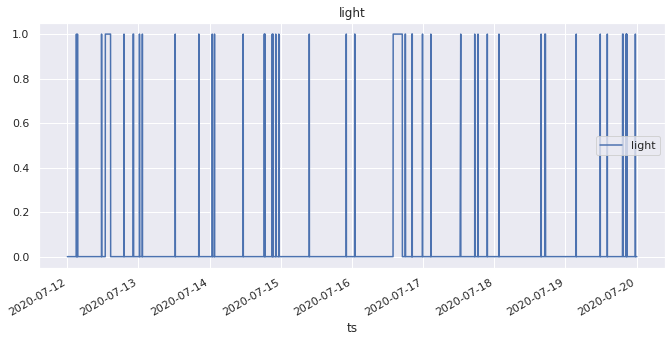

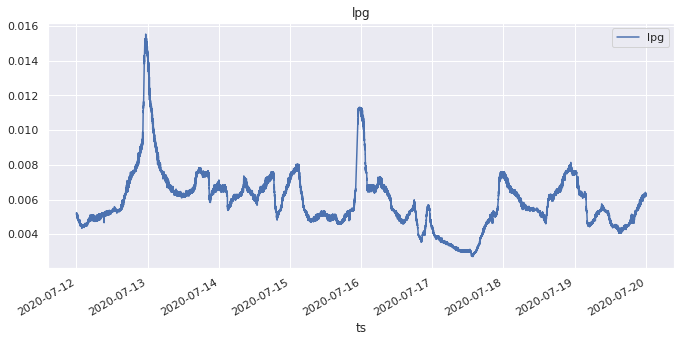

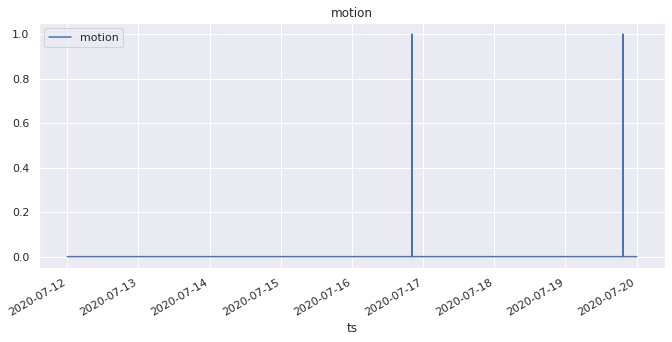

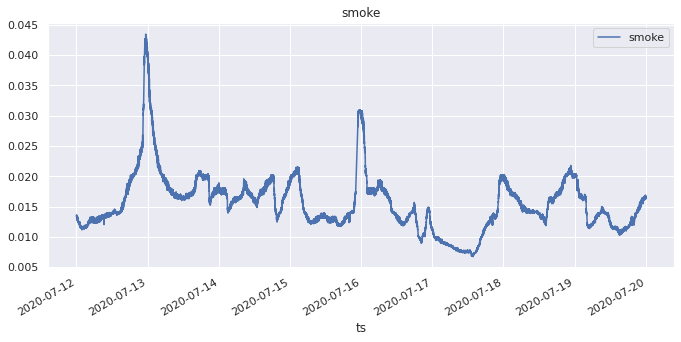

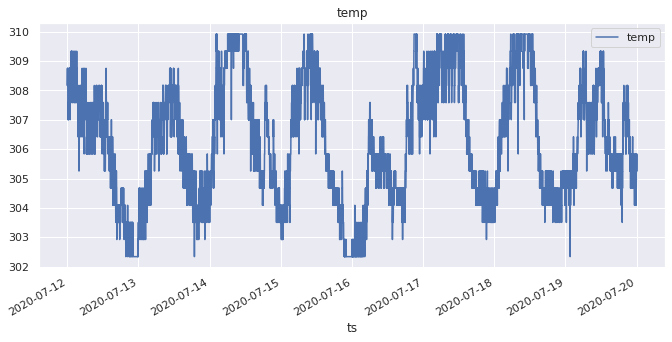

In [60]:
for col in data3.columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    data1.plot(y=col, use_index=True, ax=ax)
    ax.set_title(col)
plt.show()